<font size = '8' color ='red'> <b>ch10 pandas (데이터프레임,시리즈) </b>

- pip instatll pandas (cmd창에서 실행)





































































































































# 1절 판다스 패키지

- 데이터 분석을 위한 반드시 알아야 할 패키지. 넘파이를 기반으로 하며, 다른 라이브러리와 잘 통함되어 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치처리,크기변경(열삭제/추가,행삭제/추가),데이터정렬,데이터분할,데이터병합,통계처리,부분데이터추출,파일입출력,레이블링,시각화용이,...

In [21]:
import numpy as np
np.pi

3.141592653589793

In [22]:
import pandas as pd
pd.__version__

'2.1.4'

In [23]:
data = pd.read_json('data/ch10_member1.json',encoding='CP949')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [24]:
data = pd.read_json('data/ch10_member2.json',encoding='utf-8')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [25]:
member1 = pd.read_csv('data/ch09_member1.csv',header=None,names=['name','age','email','address'],encoding='utf-8')
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


# 2절 데이터프레임 만들기

## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [26]:
d = {'name' :['홍길동','신길동'],'age':[20,30]}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용하여 데이터 프레임 만들기

In [27]:
d = [{'name':'홍길동','age':20},{'name':'신길동','age':30}]
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.3 read_csv()

In [28]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df.shape #행,열

(17, 22)

In [29]:
df.head(5) #상위 몇줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [30]:
pd.options.display.max_columns #최대 데이터프레임의 표현될 수 있는 열 수

20

In [31]:
pd.options.display.max_columns = 22

In [32]:
df.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573


## 2.4 sklearn,statsmodels,searborn 등의 라이브러리에서 데이터프레임 불러오기

In [33]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris",package="datasets").data
iris.tail() #끝 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절 이름(열,행) 지정하기

In [34]:
member_df = pd.read_csv('data/ch09_member1.csv',header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [35]:
member_df.columns = ['name','age','email','address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [36]:
member_df = pd.concat([member_df,member_df])
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구


In [37]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [38]:
member_df.index = ['동','서','남','북','중','신']*2
member_df

,name,age,email,address
동,홍길동,20,hong@hong.com,서울시 강동구
서,박길서,33,park@hong.com,서울시 강서구
남,신진서,25,shin@hong.com,서울시 강서구
북,정하영,30,hayoung@hong.com,서울시 강남구
중,이동재,29,lee@hong.com,서울시 강북구
신,마이클,40,mike@hong.com,서울시 강동구
동,홍길동,20,hong@hong.com,서울시 강동구
서,박길서,33,park@hong.com,서울시 강서구
남,신진서,25,shin@hong.com,서울시 강서구
북,정하영,30,hayoung@hong.com,서울시 강남구


In [39]:
member_df.index = range(len(member_df))
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,신진서,25,shin@hong.com,서울시 강서구
9,정하영,30,hayoung@hong.com,서울시 강남구


In [40]:
# name을 행이름
member_df.set_index("name",inplace=True) # inplace = True => 데이터프레임에 적용
#member_df.set_index("name",inplace=True)
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
신진서,25,shin@hong.com,서울시 강서구
정하영,30,hayoung@hong.com,서울시 강남구
이동재,29,lee@hong.com,서울시 강북구
마이클,40,mike@hong.com,서울시 강동구
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
신진서,25,shin@hong.com,서울시 강서구


In [41]:
# 행이름을 컬럼에 편입시키기
# member_df=member_df.reset_index() #reset 적용한 것을 return
member_df.reset_index(inplace=True)
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,신진서,25,shin@hong.com,서울시 강서구
9,정하영,30,hayoung@hong.com,서울시 강남구


In [42]:
name = member_df['name'] # 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     신진서
3     정하영
4     이동재
5     마이클
6     홍길동
7     박길서
8     신진서
9     정하영
10    이동재
11    마이클
Name: name, dtype: object

In [43]:
member = member_df.loc[0] #0번 인덱스 행 => 시리즈
print(type(member))
member

<class 'pandas.core.series.Series'>


name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [44]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [45]:
member_df['age']= member_df['age'].astype('float64') #열의 타입을 변경

In [46]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     12 non-null     object 
 1   age      12 non-null     float64
 2   email    12 non-null     object 
 3   address  12 non-null     object 
dtypes: float64(1), object(3)
memory usage: 516.0+ bytes


In [47]:
member_df

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,서울시 강서구
2,신진서,25.0,shin@hong.com,서울시 강서구
3,정하영,30.0,hayoung@hong.com,서울시 강남구
4,이동재,29.0,lee@hong.com,서울시 강북구
5,마이클,40.0,mike@hong.com,서울시 강동구
6,홍길동,20.0,hong@hong.com,서울시 강동구
7,박길서,33.0,park@hong.com,서울시 강서구
8,신진서,25.0,shin@hong.com,서울시 강서구
9,정하영,30.0,hayoung@hong.com,서울시 강남구


# 4절 부분 데이터 조회

- 특정열,특정행,특정행의 특정열,특정조건의 행 모든 열,특정조건의 행의 특정열

In [48]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


## 4.1 단일열 조회

In [49]:
member['name'] #시리즈

0    홍길동
1    박길서
2    신진서
3    정하영
4    이동재
5    마이클
Name: name, dtype: object

In [50]:
member['name'].to_frame()

,name
0,홍길동
1,박길서
2,신진서
3,정하영
4,이동재
5,마이클


## 4.2 loc[]을 이용한 이름(열,행)으로 조회

### 단일행,여러열,행과 열을 동시에 접근
- member.loc[행(행슬라이싱),열(열슬라이싱)]

In [51]:
member.loc[0]

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [52]:
member.loc[0:5]

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [53]:
member.loc[:,'name'] #from : to : step

0    홍길동
1    박길서
2    신진서
3    정하영
4    이동재
5    마이클
Name: name, dtype: object

In [54]:
member.loc[:,'name':'email']

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,신진서,25,shin@hong.com
3,정하영,30,hayoung@hong.com
4,이동재,29,lee@hong.com
5,마이클,40,mike@hong.com


In [55]:
#여러열(name열과 email열)
member.loc[:,['name','email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,신진서,shin@hong.com
3,정하영,hayoung@hong.com
4,이동재,lee@hong.com
5,마이클,mike@hong.com


In [56]:
member.loc[1:4,['name','email','address']]

,name,email,address
1,박길서,park@hong.com,서울시 강서구
2,신진서,shin@hong.com,서울시 강서구
3,정하영,hayoung@hong.com,서울시 강남구
4,이동재,lee@hong.com,서울시 강북구


In [57]:
# loc 사용시 index 이름과 column이름을 사용
member.loc[1:4 ,'name':'address']

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회

- 몇번째 행부터 몇번째 행 앞까지,몇번째 열부터 몇번쨰 열앞까지.음수가능

In [58]:
member.iloc[0:4] #슬라이싱 from:to:step  // from부터 to앞까지 step씩

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구


In [59]:
member.iloc[0,0:3] #0열부터 3열 앞까지

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

In [60]:
#맨 오른쪽 열을 제외하고 출력
member.iloc[:,:-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,신진서,25,shin@hong.com
3,정하영,30,hayoung@hong.com
4,이동재,29,lee@hong.com
5,마이클,40,mike@hong.com


In [108]:
# 0,2,4,6,... 짝수번째 항의 모든 열 출력
member.iloc[::2 , :]

,name,age,email,address
4,마이클,40,mike@hong.com,서울시 강동구
3,이동재,29,lee@hong.com,서울시 강북구
0,홍길동,20,hong@hong.com,서울시 강동구


In [62]:
#memeber의 행순서를 역순으로
member.iloc[::-1,:-1]

,name,age,email
5,마이클,40,mike@hong.com
4,이동재,29,lee@hong.com
3,정하영,30,hayoung@hong.com
2,신진서,25,shin@hong.com
1,박길서,33,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [63]:
#30살 이상의 데이터 출력
member.loc[member['age']>30] # 인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
5,마이클,40,mike@hong.com,서울시 강동구


In [64]:
address = "서울시 강서구"
address.find('강서구')

4

In [65]:
#시리즈에 문자함수를 사용하는 방법
member['address'].str.find('강서구')!=-1

0    False
1     True
2     True
3    False
4    False
5    False
Name: address, dtype: bool

In [66]:
#address 가 '강서구'인 데이터의 name,age,address를 출력
member.loc[member['address'].str.find('강서구')!=-1 , ['name','age','address']]  ##행 자리 조건

,name,age,address
1,박길서,33,서울시 강서구
2,신진서,25,서울시 강서구


In [67]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   email    6 non-null      object
 3   address  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [68]:
#결측치 확인
member.isna().sum()

name       0
age        0
email      0
address    0
dtype: int64

In [69]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
# 0~49 setosa / 50 ~99 sersicolor / 100~149 virginica
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [119]:
# species가 versicolor인 데이터의 모든열
iris_df[iris_df['species']=='versicolor'].head(3)


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [71]:
# species가 versicolor인 데이터(조건) + 열(조건)
iris_df.loc[iris_df['species']=='versicolor','sepal_length':'petal_width'].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [72]:
#열 조건
iris_df.iloc[:, :-1][iris_df['species'] =='versicolor']

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [73]:
# sepal.length 가 6.2 보다 크고 species 가 versicolor인 데이터를 출력
iris_df[(iris_df.species == 'versicolor') & (iris_df.sepal_length>6.2)] 

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [74]:
# sepal.length 가 6.2 보다 크고 species 가 versicolor인 데이터의 sepal_length 와 species,sepal_width를 출력
iris_df.loc[ (iris_df.species == 'versicolor') & (iris_df.sepal_length>6.2), ['sepal_length','sepal_width','species'] ] 

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


In [75]:
import numpy as np
member ['major'] = ['컴공','전기','전자','기계','AI',np.nan]

In [76]:
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,서울시 강서구,전기
2,신진서,25,shin@hong.com,서울시 강서구,전자
3,정하영,30,hayoung@hong.com,서울시 강남구,기계
4,이동재,29,lee@hong.com,서울시 강북구,AI
5,마이클,40,mike@hong.com,서울시 강동구,NaN


In [77]:
hobby = pd.DataFrame({'hobby' : ['놀기','자기','읽기','먹기','공부','명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [78]:
pd.concat([member,hobby],axis=1)

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,놀기
1,박길서,33,park@hong.com,서울시 강서구,전기,자기
2,신진서,25,shin@hong.com,서울시 강서구,전자,읽기
3,정하영,30,hayoung@hong.com,서울시 강남구,기계,먹기
4,이동재,29,lee@hong.com,서울시 강북구,AI,공부
5,마이클,40,mike@hong.com,서울시 강동구,NaN,명상


In [79]:
member.drop(['major'],axis=1,inplace = True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [80]:
#행 삭제
member.drop(4)

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
5,마이클,40,mike@hong.com,서울시 강동구


In [81]:
member.drop(1)

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [82]:
member.drop(1,inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,신진서,25,shin@hong.com,서울시 강서구
3,정하영,30,hayoung@hong.com,서울시 강남구
4,이동재,29,lee@hong.com,서울시 강북구
5,마이클,40,mike@hong.com,서울시 강동구


In [83]:
member.index = range(len(member))
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,신진서,25,shin@hong.com,서울시 강서구
2,정하영,30,hayoung@hong.com,서울시 강남구
3,이동재,29,lee@hong.com,서울시 강북구
4,마이클,40,mike@hong.com,서울시 강동구


# 6절 정렬

In [84]:
member.sort_index(ascending=False) #인덱스로 정렬

,name,age,email,address
4,마이클,40,mike@hong.com,서울시 강동구
3,이동재,29,lee@hong.com,서울시 강북구
2,정하영,30,hayoung@hong.com,서울시 강남구
1,신진서,25,shin@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


In [85]:
#특정열의 값 기준 정렬
member.sort_values(by = ['name','age'], inplace=True)
member

,name,age,email,address
4,마이클,40,mike@hong.com,서울시 강동구
1,신진서,25,shin@hong.com,서울시 강서구
3,이동재,29,lee@hong.com,서울시 강북구
2,정하영,30,hayoung@hong.com,서울시 강남구
0,홍길동,20,hong@hong.com,서울시 강동구


# 7절 기초통계 분석

- count : NA(결측치)를 제외한 갯수
- min
- max
- sum
- mean
- std : 표준편차
- var : 분산
- quantile 분위수(1사분위수,2사분위수,3사분위수)
- median
- corr : 상관관계

In [86]:
iris_df.min(axis=0) #모든 열 최소값

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [87]:
iris_df.iloc[:,:-1].min(axis=1) #모든 행의 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [88]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [89]:
iris_df.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [90]:
iris_df.describe() #수치형데이터의 갯수,평균,표준편차,최소최대,사분위수

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [91]:
iris_df['species'].describe() #범주형 데이터 : 전체 갯수,

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [92]:
iris_df.describe(include='all') #수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# 8절 그룹화

In [93]:
iris_df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [94]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,virginica


In [95]:
#1 1. iris 데이터에서 처음 다섯개 행만 출력하세요
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
# 2. iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. hint: y =iris.loc[:, ‘species’].to_frame()

In [97]:
y = iris.loc[:,'species'].to_frame()
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [98]:
x = iris.drop(['species'],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
temp = iris.head(50)
temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [100]:
temp.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [101]:
iris_versicolor = iris[iris['species' ]== 'versicolor' ]
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [102]:
import pandas as pd
iris_df = pd.concat([x,y],axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [103]:
iris.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [104]:
r=iris.iloc[:,:-1].corr()

<Axes: >

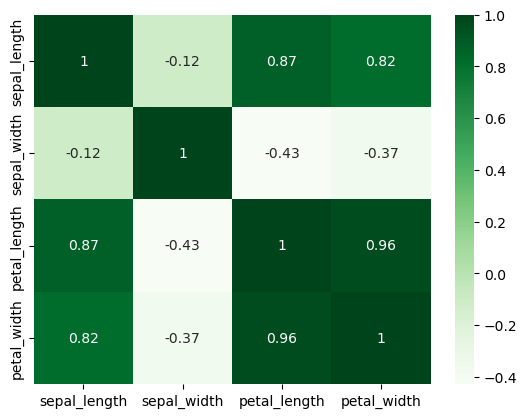

In [105]:
import seaborn as sns
sns.heatmap(r,annot=True,cmap="Greens")
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트 pip install seaborn --upgrade
# seaborn 라이브러리 업그레이드 : pip show seaborn

In [106]:
import matplotlib.pyplot as plt
plt.fighure(figsize=(12,6)) # 그래프 크기

AttributeError: module 'matplotlib.pyplot' has no attribute 'fighure'

In [ ]:
sns.__version__

In [ ]:
iris.groupby(['species']).mean()